In [1]:
from libraries import *
from load_image import load_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


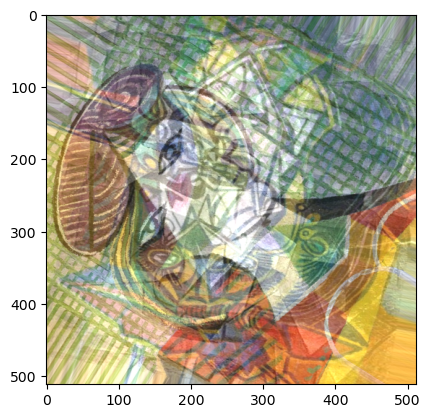

In [6]:
from one_punch_image import get_style
plt.imshow(get_style('picasso', True))

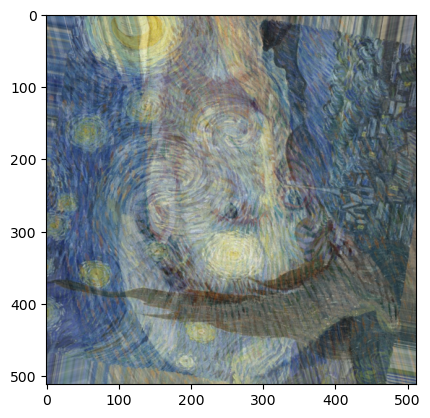

In [12]:
from Vangogh import get_vangogh_style
plt.imshow(get_vangogh_style(True))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


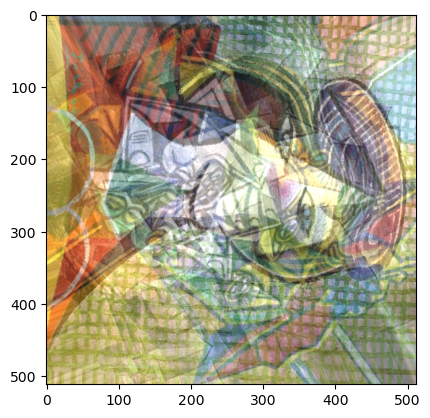

In [10]:
from Pablopicasso import get_picasso_style
plt.imshow(get_picasso_style(True))

In [4]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

In [5]:
style_paths = ['/Users/rudra_sarkar/Documents/Mtech Second Sem/Deep Learning/images/7578892@2x.jpeg',
                '/Users/rudra_sarkar/Documents/Mtech Second Sem/Deep Learning/images/disintegration_20of_20the_20persistence_20of_20memory.jpeg']


images = [np.array(load_img(img)).reshape(512, 512, 3) for img in style_paths]
# weights = [np.random.rand() for _ in images]
# weights = [(i)/sum(weights) for i in weights]
# images = [i*j for i,j in zip(images, weights)]
images = np.array(images)


In [6]:
weights

NameError: name 'weights' is not defined

In [7]:
image_copy = images.reshape(2, 786432)
img_transpose = image_copy.T

In [8]:
from sklearn.utils.extmath import randomized_svd
U, S, Vt = randomized_svd(img_transpose, n_components=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


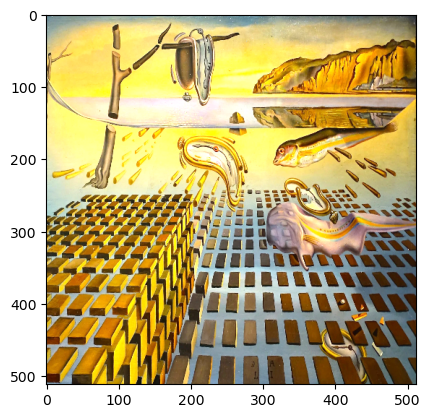

In [7]:
t = U*S*1.4
t = t.reshape(512, 512, 3)
plt.imshow(t)

In [8]:
t

array([[[0.38490796, 0.49782422, 0.55465066],
        [0.3898124 , 0.5027302 , 0.55956465],
        [0.39322546, 0.50613886, 0.56297547],
        ...,
        [0.13315639, 0.15881607, 0.17424598],
        [0.16521318, 0.19290017, 0.20813696],
        [0.10998419, 0.15486152, 0.16839126]],

       [[0.38433194, 0.5075061 , 0.5592124 ],
        [0.38841477, 0.5115889 , 0.5632952 ],
        [0.38946342, 0.5126375 , 0.56434387],
        ...,
        [0.16328482, 0.18391095, 0.19934092],
        [0.17807062, 0.20168886, 0.21820812],
        [0.16201563, 0.16830671, 0.1939988 ]],

       [[0.40980974, 0.53298384, 0.58469015],
        [0.40980494, 0.5329791 , 0.58468544],
        [0.4098085 , 0.53298265, 0.58468896],
        ...,
        [0.1699513 , 0.19046818, 0.20590259],
        [0.19938964, 0.21846087, 0.23498015],
        [0.17175052, 0.17842548, 0.20412318]],

       ...,

       [[0.271564  , 0.2734028 , 0.25645062],
        [0.20124903, 0.18937595, 0.16837025],
        [0.18742555, 0

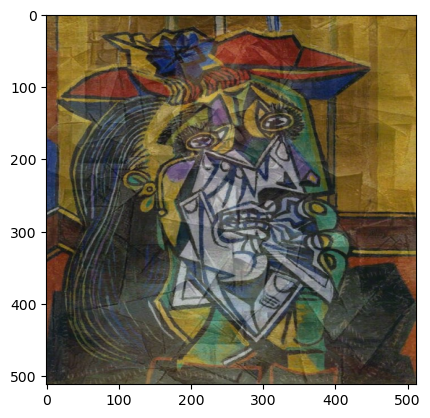

In [12]:
from Pablopicasso import get_picasso_style
p = get_picasso_style()
plt.imshow(p)

2023-05-28 00:38:59.409513: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-28 00:38:59.409532: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



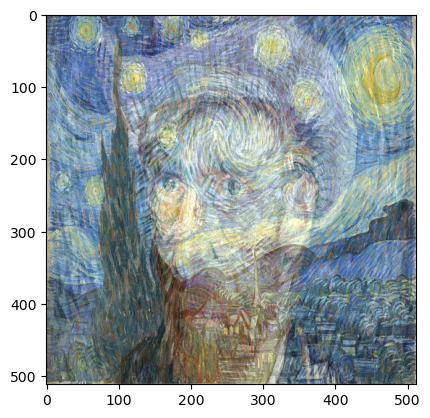

In [2]:
from Vangogh import get_vangogh_style
vg = get_vangogh_style()
plt.imshow(vg)

In [44]:
from tensorflow import keras
from keras.models import Model
from keras import layers
class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = keras.Sequential([
            layers.Input(shape = (512,512,2)),
            layers.Conv2D(1, (3,3), padding = 'same', activity_regularizer = keras.regularizers.l2(1e-7),activation = 'tanh'),
            
        ])
        self.decoder = keras.Sequential([
            layers.Conv2DTranspose(6, kernel_size=(3,3), padding='same', activation='exponential'),
            layers.Conv2DTranspose(12, kernel_size=(3,3), padding='same', activation='sigmoid'),
            layers.Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

ac = Autoencoder()
ac.compile(loss = keras.losses.CosineSimilarity(), optimizer=keras.optimizers.legacy.Adam(1e-3))

In [45]:
img = images.reshape(2,512, 512,3)
img = img/img.max()
img = img.T
print(img.shape)

(3, 512, 512, 2)


In [46]:
ac.fit(img, img, epochs = 10)

Epoch 1/10


2023-05-30 21:32:59.355651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 525ms/step - loss: -1.2256
Epoch 2/10
1/1 [==============================] - 0s 115ms/step - loss: -1.2257
Epoch 3/10
1/1 [==============================] - 0s 108ms/step - loss: -1.2258
Epoch 4/10
1/1 [==============================] - 0s 109ms/step - loss: -1.2258
Epoch 5/10
1/1 [==============================] - 0s 106ms/step - loss: -1.2259
Epoch 6/10
1/1 [==============================] - 0s 107ms/step - loss: -1.2260
Epoch 7/10
1/1 [==============================] - 0s 106ms/step - loss: -1.2260
Epoch 8/10
1/1 [==============================] - 0s 106ms/step - loss: -1.2261
Epoch 9/10
1/1 [==============================] - 0s 107ms/step - loss: -1.2261
Epoch 10/10
1/1 [==============================] - 0s 105ms/step - loss: -1.2262


In [47]:
z = ac.encoder(img).numpy()
z = z.T
z = z.reshape(512, 512, 3)

In [48]:
x = z+0.4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


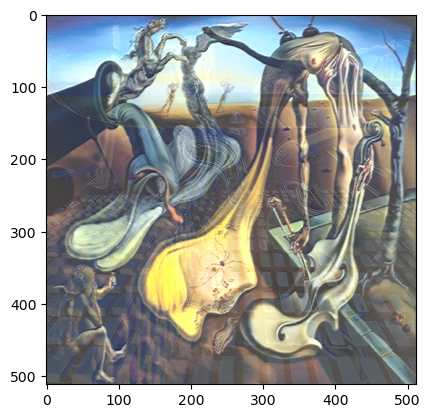

In [49]:
plt.imshow(x)

In [15]:
import numpy as np
print(np.random.randn())

-0.09479910801355024


In [14]:
import os
path = '/Users/rudra_sarkar/Documents/Mtech Second Sem/Deep Learning/NST/picasso/'
files = [os.path.join(path, fname) for fname in os.listdir(path)]
images = [np.array(load_img(fname)).reshape(512, 512, 3) for fname in files]
images = np.array(images)


In [45]:
from keras.preprocessing.image import ImageDataGenerator
z = ImageDataGenerator().apply_transform(images[0], transform_parameters={'theta':30, "shear":20.0})


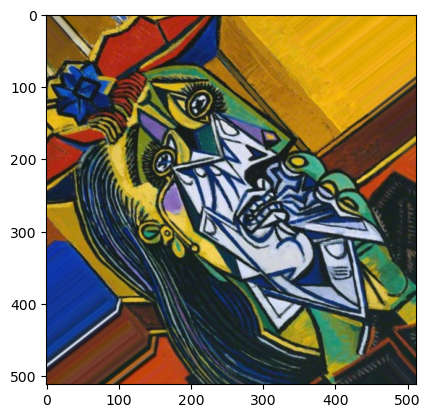

In [46]:
plt.imshow(z)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


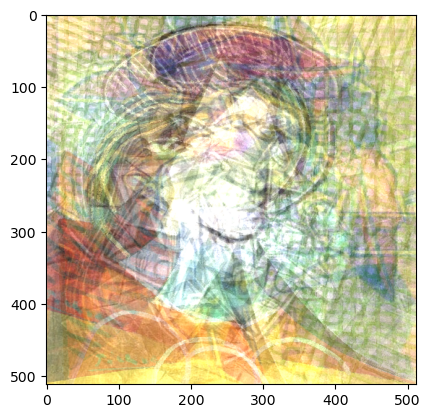

In [7]:
from Pablopicasso import get_picasso_style
plt.imshow(get_picasso_style(True)*0.9)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


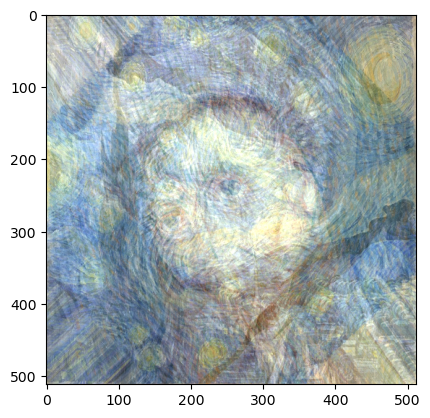

In [8]:
from Vangogh import get_vangogh_style
plt.imshow(get_vangogh_style(True))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-06-16 00:03:29.587753: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-16 00:03:29.587774: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


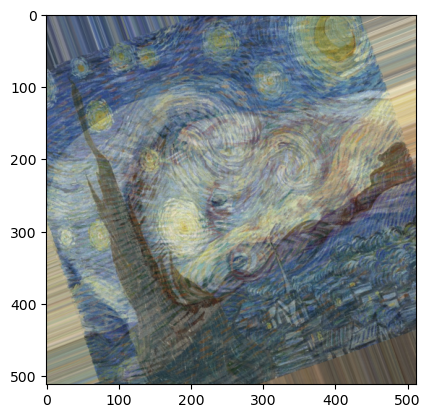

In [1]:
from one_punch_image import ConcreteStyleFactory
c = ConcreteStyleFactory().get_style('vangogh', True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


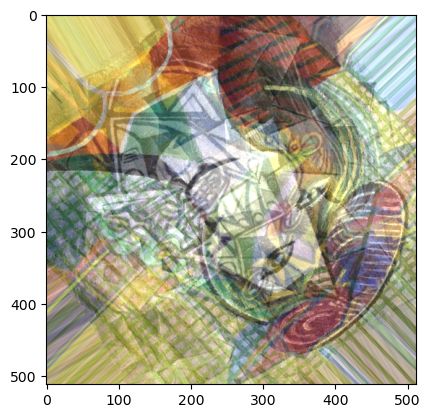

In [2]:
c2 = ConcreteStyleFactory().get_style('picasso', True)